# Imports

In [1]:
import os
import pandas as pd
import numpy as np
import scipy
import pickle
import sys  

# Set Directory Paths

In [2]:
# Location of the data folder
%store -r dataDir

# Location of where the formatted data will be saved to
%store -r layer_dataDir

# Loading Layer Neuron Data

In [3]:
layer_neuron_df = pd.read_excel(os.path.join(dataDir, 'allDATA_byTYPE.xlsx'))

In [4]:
layer_neuron_df

,NeuN Merge,Ratio Merge,AutopsyID,Hemisphere,DiagnosticHemi,CorticalType,AnatomyROI,Meso_Iso,Antibody,L1,...,CDR_Total,BEH_0-13_Year0,BEH_0-13_Year1,BEH_0-13_Year3,BEH_0-13_Year5,BEH_3-1change,BEH_3-0change,BEH_5-0change,#visits,LastVisitfromOnset
0,2012-124_R_1,2012-124_R_NeuN,2012-124,R,Right,1,aCC,Mesocortex,NeuN,0.004898,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
1,2012-124_R_2,2012-124_R_NeuN,2012-124,R,Right,2,aCC,Mesocortex,NeuN,0.016580,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
2,2012-124_R_3,2012-124_R_NeuN,2012-124,R,Right,3,aCC,Mesocortex,NeuN,0.012605,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
3,2012-124_R_4,2012-124_R_NeuN,2012-124,R,Right,4,mOFC,Isocortex,NeuN,0.017521,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
4,2012-124_R_5,2012-124_R_NeuN,2012-124,R,Right,5,MFC,Isocortex,NeuN,NaN,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,2007-003_R_4,2007-003_R_SMI32,2007-003,R,Right,4,mOFC,Isocortex,SMI32,0.052816,...,19,4.0,5.0,5.0,5.0,0.0,1.0,1.0,2.0,6.0
1020,2007-003_R_5,2007-003_R_SMI32,2007-003,R,Right,5,MFC,Isocortex,SMI32,0.001465,...,19,4.0,5.0,5.0,5.0,0.0,1.0,1.0,2.0,6.0
1021,2008-001_R_1,2008-001_R_SMI32,2008-001,R,Right,1,aCC,Mesocortex,SMI32,0.000735,...,19,3.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,7.0
1022,2008-001_R_2,2008-001_R_SMI32,2008-001,R,Right,2,aCC,Mesocortex,SMI32,0.000404,...,19,3.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,7.0


## Remove rows where CDx_FINAL = x

In [5]:
layer_neuron_df = layer_neuron_df[layer_neuron_df['CDx_FINAL'] != 'x']

In [6]:
layer_neuron_df

,NeuN Merge,Ratio Merge,AutopsyID,Hemisphere,DiagnosticHemi,CorticalType,AnatomyROI,Meso_Iso,Antibody,L1,...,CDR_Total,BEH_0-13_Year0,BEH_0-13_Year1,BEH_0-13_Year3,BEH_0-13_Year5,BEH_3-1change,BEH_3-0change,BEH_5-0change,#visits,LastVisitfromOnset
0,2012-124_R_1,2012-124_R_NeuN,2012-124,R,Right,1,aCC,Mesocortex,NeuN,0.004898,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
1,2012-124_R_2,2012-124_R_NeuN,2012-124,R,Right,2,aCC,Mesocortex,NeuN,0.016580,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
2,2012-124_R_3,2012-124_R_NeuN,2012-124,R,Right,3,aCC,Mesocortex,NeuN,0.012605,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
3,2012-124_R_4,2012-124_R_NeuN,2012-124,R,Right,4,mOFC,Isocortex,NeuN,0.017521,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
4,2012-124_R_5,2012-124_R_NeuN,2012-124,R,Right,5,MFC,Isocortex,NeuN,NaN,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,2007-003_R_4,2007-003_R_SMI32,2007-003,R,Right,4,mOFC,Isocortex,SMI32,0.052816,...,19,4.0,5.0,5.0,5.0,0.0,1.0,1.0,2.0,6.0
1020,2007-003_R_5,2007-003_R_SMI32,2007-003,R,Right,5,MFC,Isocortex,SMI32,0.001465,...,19,4.0,5.0,5.0,5.0,0.0,1.0,1.0,2.0,6.0
1021,2008-001_R_1,2008-001_R_SMI32,2008-001,R,Right,1,aCC,Mesocortex,SMI32,0.000735,...,19,3.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,7.0
1022,2008-001_R_2,2008-001_R_SMI32,2008-001,R,Right,2,aCC,Mesocortex,SMI32,0.000404,...,19,3.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,7.0


## Format into desired format

## Divide into Total neurons (NeuN) vs pyramidal neurons (SMI32)

In [7]:
neuron_type = layer_neuron_df.groupby('Antibody')

# NeuN DataFrame
NeuN_df = neuron_type.get_group('NeuN')
# SMI43 DataFrame
SMI32_df = neuron_type.get_group('SMI32')

In [8]:
NeuN_df

,NeuN Merge,Ratio Merge,AutopsyID,Hemisphere,DiagnosticHemi,CorticalType,AnatomyROI,Meso_Iso,Antibody,L1,...,CDR_Total,BEH_0-13_Year0,BEH_0-13_Year1,BEH_0-13_Year3,BEH_0-13_Year5,BEH_3-1change,BEH_3-0change,BEH_5-0change,#visits,LastVisitfromOnset
0,2012-124_R_1,2012-124_R_NeuN,2012-124,R,Right,1,aCC,Mesocortex,NeuN,0.004898,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
1,2012-124_R_2,2012-124_R_NeuN,2012-124,R,Right,2,aCC,Mesocortex,NeuN,0.016580,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
2,2012-124_R_3,2012-124_R_NeuN,2012-124,R,Right,3,aCC,Mesocortex,NeuN,0.012605,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
3,2012-124_R_4,2012-124_R_NeuN,2012-124,R,Right,4,mOFC,Isocortex,NeuN,0.017521,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
4,2012-124_R_5,2012-124_R_NeuN,2012-124,R,Right,5,MFC,Isocortex,NeuN,NaN,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,2011-269_R_4,2011-269_R_NeuN,2011-269,R,Left,4,mOFC,Isocortex,NeuN,0.013425,...,18,3.0,4.0,5.0,6.0,1.0,2.0,3.0,1.0,7.0
1005,2015-118_L_1,2015-118_L_NeuN,2015-118,L,Right,1,aCC,Mesocortex,NeuN,0.004019,...,24,4.0,5.0,5.0,5.0,0.0,1.0,1.0,7.0,7.0
1006,2015-118_L_2,2015-118_L_NeuN,2015-118,L,Right,2,aCC,Mesocortex,NeuN,0.012675,...,24,4.0,5.0,5.0,5.0,0.0,1.0,1.0,7.0,7.0
1007,2015-118_L_3,2015-118_L_NeuN,2015-118,L,Right,3,aCC,Mesocortex,NeuN,0.009477,...,24,4.0,5.0,5.0,5.0,0.0,1.0,1.0,7.0,7.0


In [9]:
SMI32_df

,NeuN Merge,Ratio Merge,AutopsyID,Hemisphere,DiagnosticHemi,CorticalType,AnatomyROI,Meso_Iso,Antibody,L1,...,CDR_Total,BEH_0-13_Year0,BEH_0-13_Year1,BEH_0-13_Year3,BEH_0-13_Year5,BEH_3-1change,BEH_3-0change,BEH_5-0change,#visits,LastVisitfromOnset
5,2002-166_L_1,2002-166_L_SMI32,2002-166,L,Left,1,aCC,Mesocortex,SMI32,0.001076,...,11.5,5.0,6.0,6.0,6.0,0.0,1.0,1.0,1.0,2.0
6,2002-166_L_2,2002-166_L_SMI32,2002-166,L,Left,2,aCC,Mesocortex,SMI32,0.000933,...,11.5,5.0,6.0,6.0,6.0,0.0,1.0,1.0,1.0,2.0
7,2002-166_L_3,2002-166_L_SMI32,2002-166,L,Left,3,aCC,Mesocortex,SMI32,0.000873,...,11.5,5.0,6.0,6.0,6.0,0.0,1.0,1.0,1.0,2.0
8,2002-166_L_4,2002-166_L_SMI32,2002-166,L,Left,4,mOFC,Isocortex,SMI32,0.004009,...,11.5,5.0,6.0,6.0,6.0,0.0,1.0,1.0,1.0,2.0
9,2002-166_L_5,2002-166_L_SMI32,2002-166,L,Left,5,MFC,Isocortex,SMI32,NaN,...,11.5,5.0,6.0,6.0,6.0,0.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,2007-003_R_4,2007-003_R_SMI32,2007-003,R,Right,4,mOFC,Isocortex,SMI32,0.052816,...,19,4.0,5.0,5.0,5.0,0.0,1.0,1.0,2.0,6.0
1020,2007-003_R_5,2007-003_R_SMI32,2007-003,R,Right,5,MFC,Isocortex,SMI32,0.001465,...,19,4.0,5.0,5.0,5.0,0.0,1.0,1.0,2.0,6.0
1021,2008-001_R_1,2008-001_R_SMI32,2008-001,R,Right,1,aCC,Mesocortex,SMI32,0.000735,...,19,3.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,7.0
1022,2008-001_R_2,2008-001_R_SMI32,2008-001,R,Right,2,aCC,Mesocortex,SMI32,0.000404,...,19,3.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,7.0


## NeuN_df - Divide into HC, Tau, TDP

In [10]:
NeuN_cohort_type = NeuN_df.groupby('Group')

# NeuN - HC
NeuN_HC_df = NeuN_cohort_type.get_group('HC')

# NeuN - Tau
NeuN_Tau_df = NeuN_cohort_type.get_group('Tau')

# NeuN - TDP
NeuN_TDP_df = NeuN_cohort_type.get_group('TDP')

In [11]:
print(f"Number of rows in NeuN Total: {len(NeuN_df)}")
print(f"Number of rows in NeuN-HC: {len(NeuN_HC_df)}")
print(f"Number of rows in NeuN-Tau: {len(NeuN_Tau_df)}")
print(f"Number of rows in NeuN-TDP: {len(NeuN_TDP_df)}")

Number of rows in NeuN Total: 492
Number of rows in NeuN-HC: 129
Number of rows in NeuN-Tau: 125
Number of rows in NeuN-TDP: 238


## Divide into L, R Hemisphere

In [12]:
# HC
NeuN_HC_hemisphere_type = NeuN_HC_df.groupby('Hemisphere')
NeuN_HC_L_df = NeuN_HC_hemisphere_type.get_group('L')
NeuN_HC_R_df = NeuN_HC_hemisphere_type.get_group('R')

# Tau
NeuN_Tau_hemisphere_type = NeuN_Tau_df.groupby('Hemisphere')
NeuN_Tau_L_df = NeuN_Tau_hemisphere_type.get_group('L')
NeuN_Tau_R_df = NeuN_Tau_hemisphere_type.get_group('R')

# TDP
NeuN_TDP_hemisphere_type = NeuN_TDP_df.groupby('Hemisphere')
NeuN_TDP_L_df = NeuN_TDP_hemisphere_type.get_group('L')
NeuN_TDP_R_df = NeuN_TDP_hemisphere_type.get_group('R')

In [13]:
print(f"Number of rows in NeuN-HC Left: {len(NeuN_HC_L_df)}")
print(f"Number of rows in NeuN-HC Right: {len(NeuN_HC_R_df)}")

print(f"Number of rows in NeuN-Tau Left: {len(NeuN_Tau_L_df)}")
print(f"Number of rows in NeuN-Tau Right: {len(NeuN_Tau_R_df)}")

print(f"Number of rows in NeuN-TDP Left: {len(NeuN_TDP_L_df)}")
print(f"Number of rows in NeuN-TDP Right: {len(NeuN_TDP_R_df)}")

Number of rows in NeuN-HC Left: 71
Number of rows in NeuN-HC Right: 58
Number of rows in NeuN-Tau Left: 65
Number of rows in NeuN-Tau Right: 60
Number of rows in NeuN-TDP Left: 138
Number of rows in NeuN-TDP Right: 100


## SMI32_df - Divide into HC, Tau, TDP

In [14]:
SMI32_cohort_type = SMI32_df.groupby('Group')

# SMI32 - HC
SMI32_HC_df = SMI32_cohort_type.get_group('HC')

# SMI32 - Tau
SMI32_Tau_df = SMI32_cohort_type.get_group('Tau')

# SMI32 - TDP
SMI32_TDP_df = SMI32_cohort_type.get_group('TDP')

In [15]:
print(f"Number of rows in SMI32 Total: {len(SMI32_df)}")
print(f"Number of rows in SMI32-HC: {len(SMI32_HC_df)}")
print(f"Number of rows in SMI32-Tau: {len(SMI32_Tau_df)}")
print(f"Number of rows in SMI32-TDP: {len(SMI32_TDP_df)}")

Number of rows in SMI32 Total: 492
Number of rows in SMI32-HC: 129
Number of rows in SMI32-Tau: 127
Number of rows in SMI32-TDP: 236


## Divide into L, R Hemisphere

In [16]:
# HC
SMI32_HC_hemisphere_type = SMI32_HC_df.groupby('Hemisphere')
SMI32_HC_L_df = SMI32_HC_hemisphere_type.get_group('L')
SMI32_HC_R_df = SMI32_HC_hemisphere_type.get_group('R')

# Tau
SMI32_Tau_hemisphere_type = SMI32_Tau_df.groupby('Hemisphere')
SMI32_Tau_L_df = SMI32_Tau_hemisphere_type.get_group('L')
SMI32_Tau_R_df = SMI32_Tau_hemisphere_type.get_group('R')

# TDP
SMI32_TDP_hemisphere_type = SMI32_TDP_df.groupby('Hemisphere')
SMI32_TDP_L_df = SMI32_TDP_hemisphere_type.get_group('L')
SMI32_TDP_R_df = SMI32_TDP_hemisphere_type.get_group('R')

In [17]:
print(f"Number of rows in SMI32-HC Left: {len(SMI32_HC_L_df)}")
print(f"Number of rows in SMI32-HC Right: {len(SMI32_HC_R_df)}")

print(f"Number of rows in SMI32-Tau Left: {len(SMI32_Tau_L_df)}")
print(f"Number of rows in SMI32-Tau Right: {len(SMI32_Tau_R_df)}")

print(f"Number of rows in SMI32-TDP Left: {len(SMI32_TDP_L_df)}")
print(f"Number of rows in SMI32-TDP Right: {len(SMI32_TDP_R_df)}")

Number of rows in SMI32-HC Left: 71
Number of rows in SMI32-HC Right: 58
Number of rows in SMI32-Tau Left: 65
Number of rows in SMI32-Tau Right: 62
Number of rows in SMI32-TDP Left: 140
Number of rows in SMI32-TDP Right: 96


## Formatting NeuN_HC_df, NeuN_Tau_df, NeuN_TDP_df $\rightarrow$ L23 & L56 (L & R divided)

### NeuN_HC_df to numpy

In [18]:
# L + R
NeuN_HC_IDs = np.sort(NeuN_HC_df['AutopsyID'].unique())
print(NeuN_HC_IDs)
print(f"Number of unique IDs in Neun HC: {len(NeuN_HC_IDs)}")

['2007-014' '2009-059' '2010-011' '2010-177' '2010-203' '2011-141'
 '2011-255' '2012-075' '2012-118' '2012-174' '2012-193' '2013-036'
 '2013-039' '2013-092' '2013-147' '2013-165' '2013-172' '2013-189'
 '2013-235' '2014-006' '2014-100' '2014-191' '2014-192' '2014-241'
 '2015-033' '2015-137' '2015-192' '2015-198' '2015-219' '2016-071'
 '2016-113' '2017-191']
Number of unique IDs in Neun HC: 32


In [19]:
# Left
NeuN_HC_L_IDs = np.sort(NeuN_HC_L_df['AutopsyID'].unique())
print(NeuN_HC_L_IDs)
print(f"Number of unique IDs in Neun HC Left: {len(NeuN_HC_L_IDs)}")

# Right
NeuN_HC_R_IDs = np.sort(NeuN_HC_R_df['AutopsyID'].unique())
print(NeuN_HC_R_IDs)
print(f"Number of unique IDs in Neun HC Right: {len(NeuN_HC_R_IDs)}")

['2007-014' '2010-177' '2010-203' '2011-141' '2012-075' '2012-193'
 '2013-039' '2013-147' '2013-165' '2013-189' '2013-235' '2014-191'
 '2014-241' '2015-033' '2015-137' '2015-219' '2016-113' '2017-191']
Number of unique IDs in Neun HC Left: 18
['2009-059' '2010-011' '2011-255' '2012-118' '2012-174' '2013-036'
 '2013-092' '2013-172' '2014-006' '2014-100' '2014-192' '2015-192'
 '2015-198' '2016-071']
Number of unique IDs in Neun HC Right: 14


In [20]:
L_R = pd.DataFrame({'L_R': NeuN_HC_IDs})
L = pd.DataFrame({'L': NeuN_HC_L_IDs})
R = pd.DataFrame({'R': NeuN_HC_R_IDs})
pd.merge(pd.merge(L_R, L, left_on='L_R', right_on = 'L', how='outer'), 
         R, left_on='L_R', right_on = 'R', how='outer')

,L_R,L,R
0,2007-014,2007-014,NaN
1,2009-059,NaN,2009-059
2,2010-011,NaN,2010-011
3,2010-177,2010-177,NaN
4,2010-203,2010-203,NaN
5,2011-141,2011-141,NaN
6,2011-255,NaN,2011-255
7,2012-075,2012-075,NaN
8,2012-118,NaN,2012-118
9,2012-174,NaN,2012-174


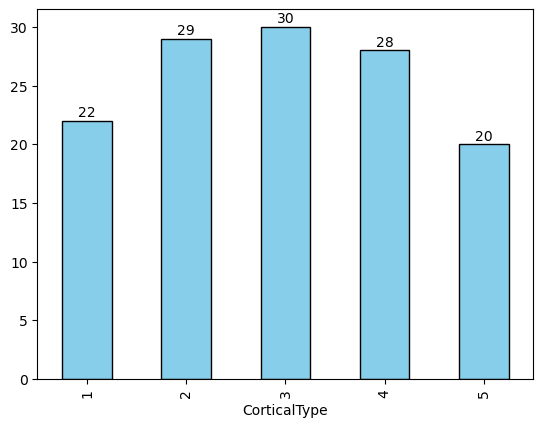

In [21]:
value_counts = NeuN_HC_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

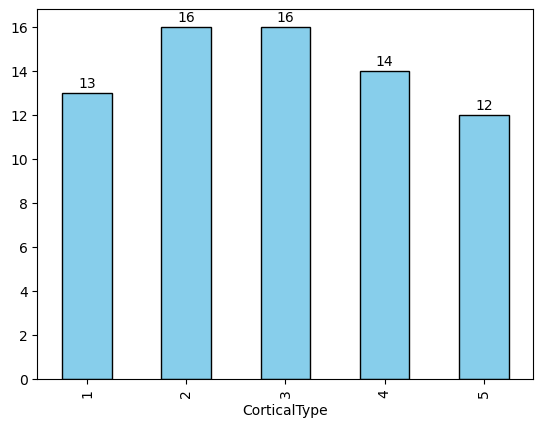

In [22]:
value_counts = NeuN_HC_L_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

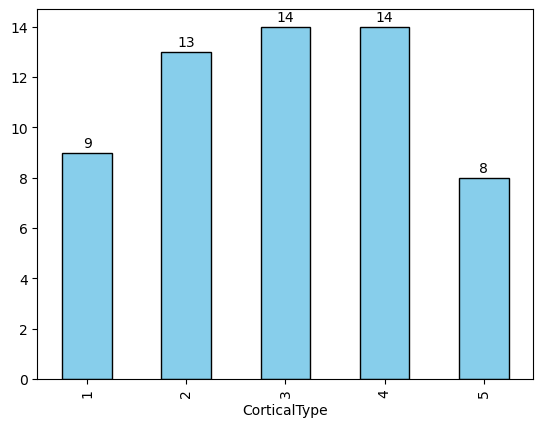

In [23]:
value_counts = NeuN_HC_R_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

In [24]:
# Left
NeuN_HC_formatted_L = pd.pivot_table(NeuN_HC_L_df, values=['L23', 'L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

# Right
NeuN_HC_formatted_R = pd.pivot_table(NeuN_HC_R_df, values=['L23', 'L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

In [25]:
# Left
NeuN_HC_L = NeuN_HC_formatted_L.to_numpy()
print(f"Shape of Neun_HC Left numpy data: {NeuN_HC_L.shape}")

# Right
NeuN_HC_R = NeuN_HC_formatted_R.to_numpy()
print(f"Shape of Neun_HC Right numpy data: {NeuN_HC_R.shape}")

Shape of Neun_HC Left numpy data: (18, 10)
Shape of Neun_HC Right numpy data: (14, 10)


### NeuN_Tau_df to numpy

In [26]:
# L+R
NeuN_Tau_IDs = np.sort(NeuN_Tau_df['AutopsyID'].unique())
print(NeuN_Tau_IDs)
print(f"Number of unique IDs in Neun Tau: {len(NeuN_Tau_IDs)}")

['1995-222' '1996-173' '2000-216' '2002-166' '2003-032' '2006-027'
 '2007-003' '2007-101' '2008-166' '2008-251' '2009-102' '2009-248'
 '2010-015' '2010-209' '2011-060' '2012-046' '2012-238' '2013-018'
 '2013-071' '2013-108' '2013-223' '2014-052' '2014-145' '2014-212'
 '2015-009' '2017-109' '2017-187']
Number of unique IDs in Neun Tau: 27


In [27]:
# Left
NeuN_Tau_L_IDs = np.sort(NeuN_Tau_L_df['AutopsyID'].unique())
print(NeuN_Tau_L_IDs)
print(f"Number of unique IDs in Neun Tau Left: {len(NeuN_Tau_L_IDs)}")

# Right
NeuN_Tau_R_IDs = np.sort(NeuN_Tau_R_df['AutopsyID'].unique())
print(NeuN_Tau_R_IDs)
print(f"Number of unique IDs in Neun Tau RIght: {len(NeuN_Tau_R_IDs)}")

['1996-173' '2000-216' '2002-166' '2006-027' '2008-251' '2009-248'
 '2010-209' '2012-238' '2013-018' '2013-071' '2013-223' '2014-145'
 '2014-212' '2015-009' '2017-109' '2017-187']
Number of unique IDs in Neun Tau Left: 16
['1995-222' '2003-032' '2007-003' '2007-101' '2008-166' '2009-102'
 '2010-015' '2011-060' '2012-046' '2012-238' '2013-018' '2013-071'
 '2013-108' '2014-052' '2014-145' '2014-212']
Number of unique IDs in Neun Tau RIght: 16


In [28]:
L_R = pd.DataFrame({'L_R': NeuN_Tau_IDs})
L = pd.DataFrame({'L': NeuN_Tau_L_IDs})
R = pd.DataFrame({'R': NeuN_Tau_R_IDs})
pd.merge(pd.merge(L_R, L, left_on='L_R', right_on = 'L', how='outer'), 
         R, left_on='L_R', right_on = 'R', how='outer')

,L_R,L,R
0,1995-222,NaN,1995-222
1,1996-173,1996-173,NaN
2,2000-216,2000-216,NaN
3,2002-166,2002-166,NaN
4,2003-032,NaN,2003-032
5,2006-027,2006-027,NaN
6,2007-003,NaN,2007-003
7,2007-101,NaN,2007-101
8,2008-166,NaN,2008-166
9,2008-251,2008-251,NaN


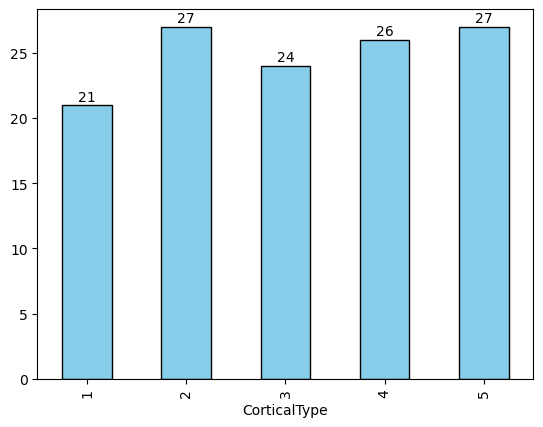

In [29]:
value_counts = NeuN_Tau_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

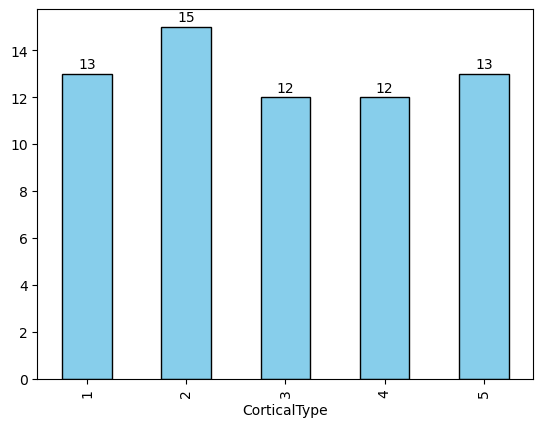

In [30]:
value_counts = NeuN_Tau_L_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

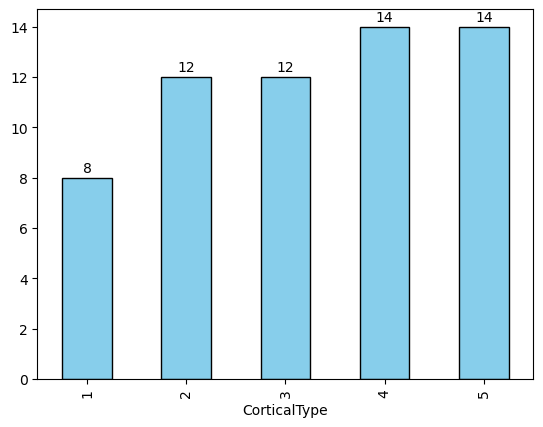

In [31]:
value_counts = NeuN_Tau_R_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

In [32]:
# Left
NeuN_Tau_L_formatted = pd.pivot_table(NeuN_Tau_L_df, values=['L23', 'L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

# Right
NeuN_Tau_R_formatted = pd.pivot_table(NeuN_Tau_R_df, values=['L23', 'L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

In [33]:
# Left
NeuN_Tau_L = NeuN_Tau_L_formatted.to_numpy()
print(f"Shape of NeuN_Tau Left numpy data: {NeuN_Tau_L.shape}")

# Right
NeuN_Tau_R = NeuN_Tau_R_formatted.to_numpy()
print(f"Shape of NeuN_Tau Right numpy data: {NeuN_Tau_R.shape}")

Shape of NeuN_Tau Left numpy data: (16, 10)
Shape of NeuN_Tau Right numpy data: (16, 10)


### NeuN_TDP_df to numpy

In [34]:
# L+R
NeuN_TDP_IDs = np.sort(NeuN_TDP_df['AutopsyID'].unique())
print(NeuN_TDP_IDs)
print(f"Number of unique IDs in Neun TDP: {len(NeuN_TDP_IDs)}")

['1995-005' '1995-217' '1999-170' '2000-149' '2001-108' '2001-122'
 '2002-025' '2002-070' '2002-238' '2003-044' '2003-114' '2004-008'
 '2004-158' '2005-208' '2006-123' '2007-039' '2007-111' '2007-148'
 '2008-001' '2008-156' '2008-205' '2009-033' '2009-097' '2009-119'
 '2009-168' '2011-191' '2011-257' '2011-269' '2012-124' '2014-087'
 '2015-008' '2015-044' '2015-062' '2015-116' '2015-118' '2016-009'
 '2016-037' '2016-161' '2016-165' '2016-241' '2017-149' '2017-190'
 '2018-066' '2018-129' '2018-146' '2018-178' '2018-208']
Number of unique IDs in Neun TDP: 47


In [35]:
# Left
NeuN_TDP_L_IDs = np.sort(NeuN_TDP_L_df['AutopsyID'].unique())
print(NeuN_TDP_L_IDs)
print(f"Number of unique IDs in Neun TDP Left: {len(NeuN_TDP_L_IDs)}")

# Right
NeuN_TDP_R_IDs = np.sort(NeuN_TDP_R_df['AutopsyID'].unique())
print(NeuN_TDP_R_IDs)
print(f"Number of unique IDs in Neun TDP Right: {len(NeuN_TDP_R_IDs)}")

['1999-170' '2001-108' '2001-122' '2002-025' '2002-238' '2003-044'
 '2003-114' '2004-008' '2004-158' '2005-208' '2007-039' '2007-148'
 '2008-205' '2009-033' '2009-097' '2009-168' '2011-191' '2011-257'
 '2011-269' '2015-008' '2015-044' '2015-062' '2015-118' '2016-009'
 '2016-037' '2016-161' '2016-165' '2016-241' '2017-149' '2018-129'
 '2018-146' '2018-178' '2018-208']
Number of unique IDs in Neun TDP Left: 33
['1995-005' '1995-217' '2000-149' '2002-070' '2005-208' '2006-123'
 '2007-111' '2008-001' '2008-156' '2009-033' '2009-119' '2009-168'
 '2011-257' '2011-269' '2012-124' '2014-087' '2015-008' '2015-044'
 '2015-062' '2015-116' '2015-118' '2016-009' '2016-161' '2017-190'
 '2018-066' '2018-129' '2018-146' '2018-208']
Number of unique IDs in Neun TDP Right: 28


In [36]:
L_R = pd.DataFrame({'L_R': NeuN_TDP_IDs})
L = pd.DataFrame({'L': NeuN_TDP_L_IDs})
R = pd.DataFrame({'R': NeuN_TDP_R_IDs})
pd.merge(pd.merge(L_R, L, left_on='L_R', right_on = 'L', how='outer'), 
         R, left_on='L_R', right_on = 'R', how='outer')

,L_R,L,R
0,1995-005,NaN,1995-005
1,1995-217,NaN,1995-217
2,1999-170,1999-170,NaN
3,2000-149,NaN,2000-149
4,2001-108,2001-108,NaN
5,2001-122,2001-122,NaN
6,2002-025,2002-025,NaN
7,2002-070,NaN,2002-070
8,2002-238,2002-238,NaN
9,2003-044,2003-044,NaN


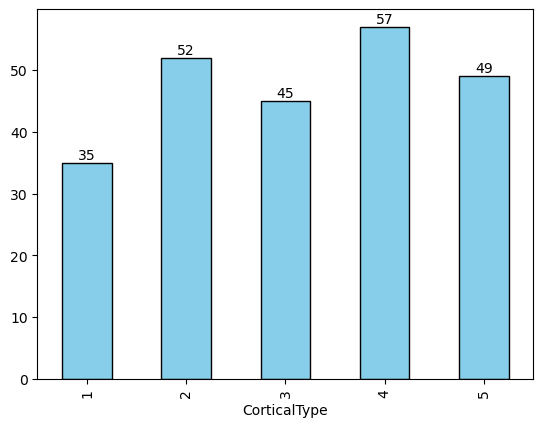

In [37]:
value_counts = NeuN_TDP_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

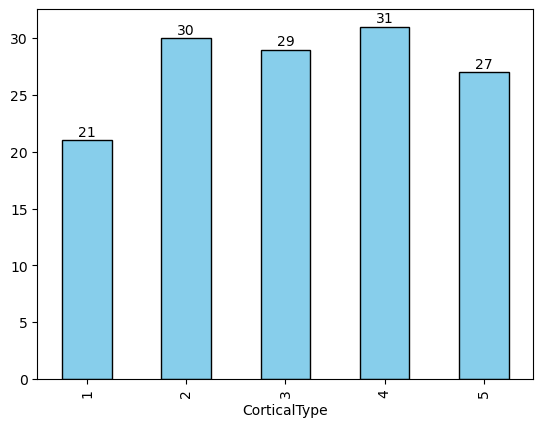

In [38]:
value_counts = NeuN_TDP_L_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

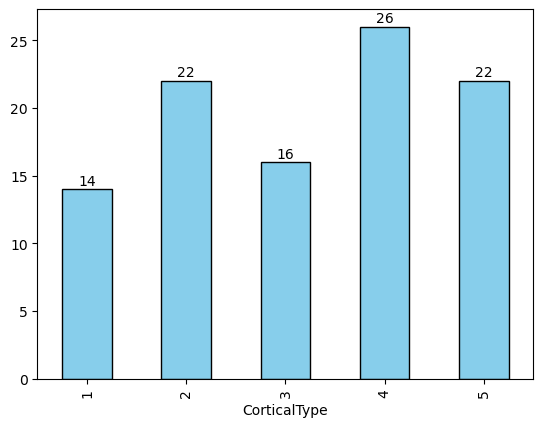

In [39]:
value_counts = NeuN_TDP_R_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

In [40]:
# Left
NeuN_TDP_L_df['CorticalType'].value_counts()

CorticalType
4    31
2    30
3    29
5    27
1    21
Name: count, dtype: int64

In [41]:
# Right
NeuN_TDP_R_df['CorticalType'].value_counts()

CorticalType
4    26
2    22
5    22
3    16
1    14
Name: count, dtype: int64

In [42]:
# Left
NeuN_TDP_L_formatted = pd.pivot_table(NeuN_TDP_L_df, values=['L23', 'L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

# Right
NeuN_TDP_R_formatted = pd.pivot_table(NeuN_TDP_R_df, values=['L23', 'L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

In [43]:
# Left
NeuN_TDP_L = NeuN_TDP_L_formatted.to_numpy()
print(f"Shape of NeuN_TDP Left numpy data: {NeuN_TDP_L.shape}")

# Right
NeuN_TDP_R = NeuN_TDP_R_formatted.to_numpy()
print(f"Shape of NeuN_TDP Right numpy data: {NeuN_TDP_R.shape}")

Shape of NeuN_TDP Left numpy data: (33, 10)
Shape of NeuN_TDP Right numpy data: (28, 10)


## Formatting SMI32_HC_df, SMI32_Tau_df, SMI32_TDP_df $\rightarrow$ ln_L23 & ln_L56

### SMI32_HC_df to numpy

In [44]:
# L+R
SMI32_HC_IDs = np.sort(SMI32_HC_df['AutopsyID'].unique())
print(SMI32_HC_IDs)
print(f"Number of unique IDs in SMI32 HC: {len(SMI32_HC_IDs)}")

['2007-014' '2009-059' '2010-011' '2010-177' '2010-203' '2011-141'
 '2011-255' '2012-075' '2012-118' '2012-174' '2012-193' '2013-036'
 '2013-039' '2013-092' '2013-147' '2013-165' '2013-172' '2013-189'
 '2013-235' '2014-006' '2014-100' '2014-191' '2014-192' '2014-241'
 '2015-033' '2015-137' '2015-192' '2015-198' '2015-219' '2016-071'
 '2016-113' '2017-191']
Number of unique IDs in SMI32 HC: 32


In [45]:
# Left
SMI32_HC_L_IDs = np.sort(SMI32_HC_L_df['AutopsyID'].unique())
print(SMI32_HC_L_IDs)
print(f"Number of unique IDs in SMI32 HC Left: {len(SMI32_HC_L_IDs)}")

# Right
SMI32_HC_R_IDs = np.sort(SMI32_HC_R_df['AutopsyID'].unique())
print(SMI32_HC_R_IDs)
print(f"Number of unique IDs in SMI32 HC Right: {len(SMI32_HC_R_IDs)}")

['2007-014' '2010-177' '2010-203' '2011-141' '2012-075' '2012-193'
 '2013-039' '2013-147' '2013-165' '2013-189' '2013-235' '2014-191'
 '2014-241' '2015-033' '2015-137' '2015-219' '2016-113' '2017-191']
Number of unique IDs in SMI32 HC Left: 18
['2009-059' '2010-011' '2011-255' '2012-118' '2012-174' '2013-036'
 '2013-092' '2013-172' '2014-006' '2014-100' '2014-192' '2015-192'
 '2015-198' '2016-071']
Number of unique IDs in SMI32 HC Right: 14


In [46]:
L_R = pd.DataFrame({'L_R': SMI32_HC_IDs})
L = pd.DataFrame({'L': SMI32_HC_L_IDs})
R = pd.DataFrame({'R': SMI32_HC_R_IDs})
pd.merge(pd.merge(L_R, L, left_on='L_R', right_on = 'L', how='outer'), 
         R, left_on='L_R', right_on = 'R', how='outer')

,L_R,L,R
0,2007-014,2007-014,NaN
1,2009-059,NaN,2009-059
2,2010-011,NaN,2010-011
3,2010-177,2010-177,NaN
4,2010-203,2010-203,NaN
5,2011-141,2011-141,NaN
6,2011-255,NaN,2011-255
7,2012-075,2012-075,NaN
8,2012-118,NaN,2012-118
9,2012-174,NaN,2012-174


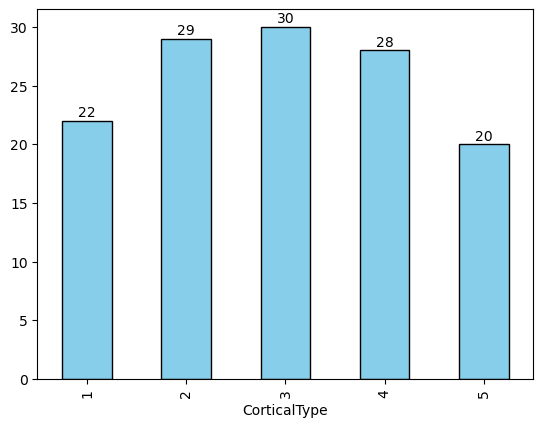

In [47]:
value_counts = SMI32_HC_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

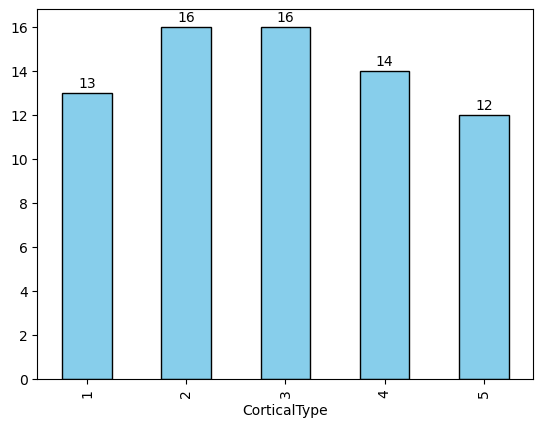

In [48]:
value_counts = SMI32_HC_L_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

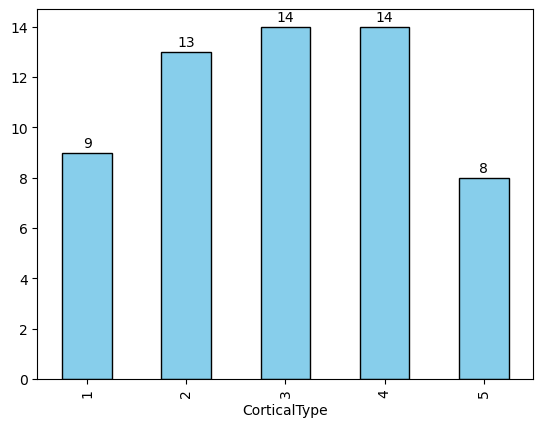

In [49]:
value_counts = SMI32_HC_R_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

In [50]:
# Left
SMI32_HC_L_df['CorticalType'].value_counts()

CorticalType
2    16
3    16
4    14
1    13
5    12
Name: count, dtype: int64

In [51]:
# Right
SMI32_HC_R_df['CorticalType'].value_counts()

CorticalType
3    14
4    14
2    13
1     9
5     8
Name: count, dtype: int64

In [52]:
# Left
SMI32_HC_L_formatted = pd.pivot_table(SMI32_HC_L_df, values=['ln_L23', 'ln_L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

# Right
SMI32_HC_R_formatted = pd.pivot_table(SMI32_HC_R_df, values=['ln_L23', 'ln_L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

In [53]:
# Left
SMI32_HC_L = SMI32_HC_L_formatted.to_numpy()
print(f"Shape of SMI32_HC Left numpy data: {SMI32_HC_L.shape}")

# Right
SMI32_HC_R = SMI32_HC_R_formatted.to_numpy()
print(f"Shape of SMI32_HC Right numpy data: {SMI32_HC_R.shape}")

Shape of SMI32_HC Left numpy data: (18, 10)
Shape of SMI32_HC Right numpy data: (14, 10)


### SMI32_Tau_df to numpy

In [54]:
# L+R
SMI32_Tau_IDs = np.sort(SMI32_Tau_df['AutopsyID'].unique())
print(SMI32_Tau_IDs)
print(f"Number of unique IDs in SMI32 Tau: {len(SMI32_Tau_IDs)}")

['1995-222' '1996-173' '2000-216' '2002-166' '2003-032' '2006-027'
 '2007-003' '2007-101' '2008-166' '2008-251' '2009-102' '2009-248'
 '2010-015' '2010-209' '2011-060' '2012-046' '2012-238' '2013-018'
 '2013-071' '2013-108' '2013-223' '2014-052' '2014-145' '2014-212'
 '2015-009' '2017-109' '2017-187']
Number of unique IDs in SMI32 Tau: 27


In [55]:
# Left
SMI32_Tau_L_IDs = np.sort(SMI32_Tau_L_df['AutopsyID'].unique())
print(SMI32_Tau_L_IDs)
print(f"Number of unique IDs in SMI32 Tau Left: {len(SMI32_Tau_L_IDs)}")

# Right
SMI32_Tau_R_IDs = np.sort(SMI32_Tau_R_df['AutopsyID'].unique())
print(SMI32_Tau_R_IDs)
print(f"Number of unique IDs in SMI32 Tau Right: {len(SMI32_Tau_R_IDs)}")

['1996-173' '2000-216' '2002-166' '2006-027' '2008-251' '2009-248'
 '2010-209' '2012-238' '2013-018' '2013-071' '2013-223' '2014-145'
 '2014-212' '2015-009' '2017-109' '2017-187']
Number of unique IDs in SMI32 Tau Left: 16
['1995-222' '2003-032' '2007-003' '2007-101' '2008-166' '2009-102'
 '2010-015' '2011-060' '2012-046' '2012-238' '2013-018' '2013-071'
 '2013-108' '2014-052' '2014-145' '2014-212' '2017-187']
Number of unique IDs in SMI32 Tau Right: 17


In [56]:
L_R = pd.DataFrame({'L_R': SMI32_Tau_IDs})
L = pd.DataFrame({'L': SMI32_Tau_L_IDs})
R = pd.DataFrame({'R': SMI32_Tau_R_IDs})
pd.merge(pd.merge(L_R, L, left_on='L_R', right_on = 'L', how='outer'), 
         R, left_on='L_R', right_on = 'R', how='outer')

,L_R,L,R
0,1995-222,NaN,1995-222
1,1996-173,1996-173,NaN
2,2000-216,2000-216,NaN
3,2002-166,2002-166,NaN
4,2003-032,NaN,2003-032
5,2006-027,2006-027,NaN
6,2007-003,NaN,2007-003
7,2007-101,NaN,2007-101
8,2008-166,NaN,2008-166
9,2008-251,2008-251,NaN


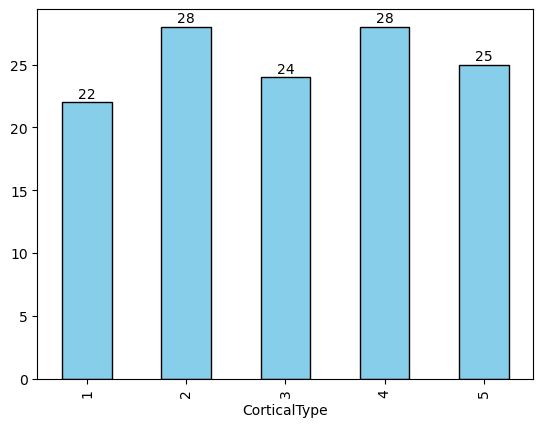

In [57]:
value_counts = SMI32_Tau_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

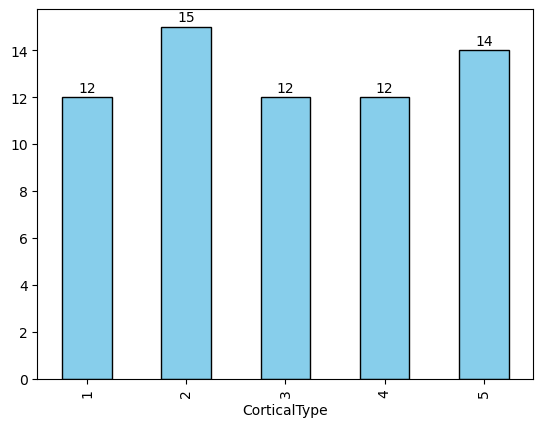

In [58]:
value_counts = SMI32_Tau_L_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

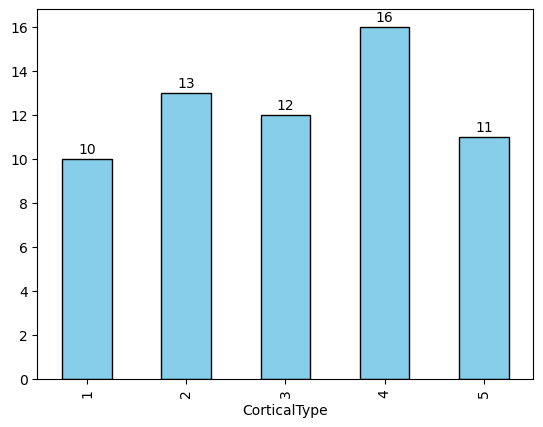

In [59]:
value_counts = SMI32_Tau_R_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

In [60]:
# Left
SMI32_Tau_L_df['CorticalType'].value_counts()

CorticalType
2    15
5    14
1    12
3    12
4    12
Name: count, dtype: int64

In [61]:
# Right
SMI32_Tau_R_df['CorticalType'].value_counts()

CorticalType
4    16
2    13
3    12
5    11
1    10
Name: count, dtype: int64

In [62]:
# Left
SMI32_Tau_L_formatted = pd.pivot_table(SMI32_Tau_L_df, values=['ln_L23', 'ln_L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

# Right
SMI32_Tau_R_formatted = pd.pivot_table(SMI32_Tau_R_df, values=['ln_L23', 'ln_L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

In [63]:
# Left
SMI32_Tau_L = SMI32_Tau_L_formatted.to_numpy()
print(f"Shape of SMI32_Tau Left numpy data: {SMI32_Tau_L.shape}")

# Right
SMI32_Tau_R = SMI32_Tau_R_formatted.to_numpy()
print(f"Shape of SMI32_Tau Right numpy data: {SMI32_Tau_R.shape}")

Shape of SMI32_Tau Left numpy data: (16, 10)
Shape of SMI32_Tau Right numpy data: (17, 10)


### SMI32_TDP_df to numpy

In [64]:
# L+R
SMI32_TDP_IDs = np.sort(SMI32_TDP_df['AutopsyID'].unique())
print(SMI32_TDP_IDs)
print(f"Number of unique IDs in SMI32 TDP: {len(SMI32_TDP_IDs)}")

['1995-005' '1995-217' '1999-170' '2000-149' '2001-108' '2001-122'
 '2002-025' '2002-070' '2002-238' '2003-044' '2003-114' '2004-008'
 '2004-158' '2005-208' '2006-123' '2007-039' '2007-111' '2007-148'
 '2008-001' '2008-156' '2008-205' '2009-033' '2009-097' '2009-119'
 '2009-168' '2011-191' '2011-257' '2011-269' '2012-124' '2014-087'
 '2015-008' '2015-044' '2015-062' '2015-116' '2015-118' '2016-009'
 '2016-037' '2016-161' '2016-165' '2016-241' '2017-149' '2017-190'
 '2018-066' '2018-129' '2018-146' '2018-178' '2018-208']
Number of unique IDs in SMI32 TDP: 47


In [65]:
# Left
SMI32_TDP_L_IDs = np.sort(SMI32_TDP_L_df['AutopsyID'].unique())
print(SMI32_TDP_L_IDs)
print(f"Number of unique IDs in SMI32 TDP Left: {len(SMI32_TDP_L_IDs)}")

# Right
SMI32_TDP_R_IDs = np.sort(SMI32_TDP_R_df['AutopsyID'].unique())
print(SMI32_TDP_R_IDs)
print(f"Number of unique IDs in SMI32 TDP Right: {len(SMI32_TDP_R_IDs)}")

['1999-170' '2001-108' '2001-122' '2002-025' '2002-238' '2003-044'
 '2003-114' '2004-008' '2004-158' '2005-208' '2007-039' '2007-148'
 '2008-205' '2009-033' '2009-097' '2009-168' '2011-191' '2011-257'
 '2011-269' '2015-008' '2015-044' '2015-062' '2015-118' '2016-009'
 '2016-037' '2016-161' '2016-165' '2016-241' '2017-149' '2018-129'
 '2018-146' '2018-178' '2018-208']
Number of unique IDs in SMI32 TDP Left: 33
['1995-005' '1995-217' '2000-149' '2002-070' '2005-208' '2006-123'
 '2007-111' '2008-001' '2008-156' '2009-033' '2009-119' '2009-168'
 '2011-257' '2011-269' '2012-124' '2014-087' '2015-008' '2015-044'
 '2015-062' '2015-116' '2015-118' '2016-009' '2016-161' '2017-190'
 '2018-066' '2018-129' '2018-146' '2018-208']
Number of unique IDs in SMI32 TDP Right: 28


In [66]:
L_R = pd.DataFrame({'L_R': SMI32_TDP_IDs})
L = pd.DataFrame({'L': SMI32_TDP_L_IDs})
R = pd.DataFrame({'R': SMI32_TDP_R_IDs})
pd.merge(pd.merge(L_R, L, left_on='L_R', right_on = 'L', how='outer'), 
         R, left_on='L_R', right_on = 'R', how='outer')

,L_R,L,R
0,1995-005,NaN,1995-005
1,1995-217,NaN,1995-217
2,1999-170,1999-170,NaN
3,2000-149,NaN,2000-149
4,2001-108,2001-108,NaN
5,2001-122,2001-122,NaN
6,2002-025,2002-025,NaN
7,2002-070,NaN,2002-070
8,2002-238,2002-238,NaN
9,2003-044,2003-044,NaN


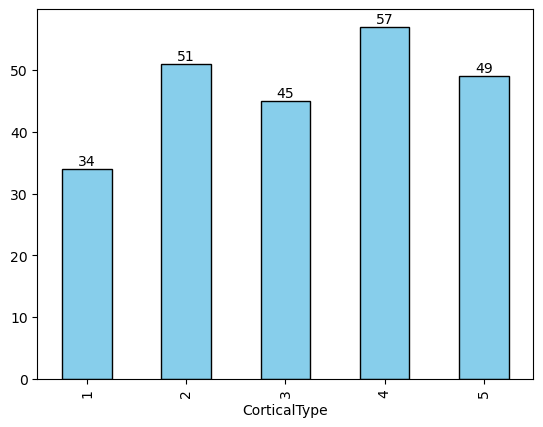

In [67]:
value_counts = SMI32_TDP_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

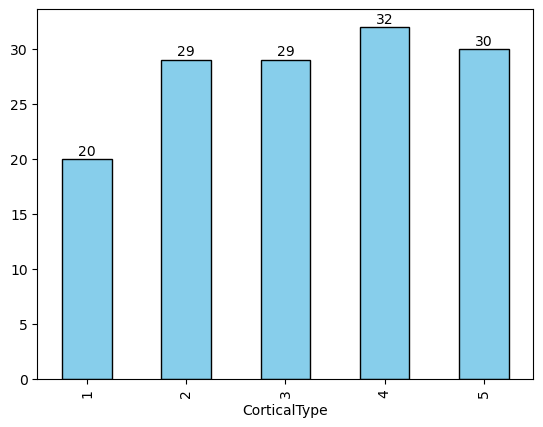

In [68]:
value_counts = SMI32_TDP_L_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

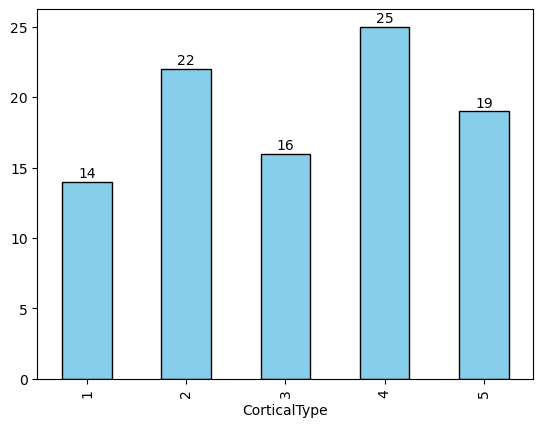

In [69]:
value_counts = SMI32_TDP_R_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

In [70]:
# Left
SMI32_TDP_L_df['CorticalType'].value_counts()

CorticalType
4    32
5    30
2    29
3    29
1    20
Name: count, dtype: int64

In [71]:
# Right
SMI32_TDP_R_df['CorticalType'].value_counts()

CorticalType
4    25
2    22
5    19
3    16
1    14
Name: count, dtype: int64

In [72]:
# Left
SMI32_TDP_L_formatted = pd.pivot_table(SMI32_TDP_L_df, values=['ln_L23', 'ln_L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

# Right
SMI32_TDP_R_formatted = pd.pivot_table(SMI32_TDP_R_df, values=['ln_L23', 'ln_L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

In [73]:
# Left
SMI32_TDP_L = SMI32_TDP_L_formatted.to_numpy()
print(f"Shape of SMI32_TDP Left numpy data: {SMI32_TDP_L.shape}")

# Right
SMI32_TDP_R = SMI32_TDP_R_formatted.to_numpy()
print(f"Shape of SMI32_TDP Right numpy data: {SMI32_TDP_R.shape}")

Shape of SMI32_TDP Left numpy data: (33, 10)
Shape of SMI32_TDP Right numpy data: (28, 10)


# Verifying that correct formating

## Shape of dataset

In [74]:
print(NeuN_HC_L.shape)
print(NeuN_Tau_L.shape)
print(NeuN_TDP_L.shape)

print(NeuN_HC_R.shape)
print(NeuN_Tau_R.shape)
print(NeuN_TDP_R.shape)

(18, 10)
(16, 10)
(33, 10)
(14, 10)
(16, 10)
(28, 10)


In [75]:
print(SMI32_HC_L.shape)
print(SMI32_Tau_L.shape)
print(SMI32_TDP_L.shape)

print(SMI32_HC_R.shape)
print(SMI32_Tau_R.shape)
print(SMI32_TDP_R.shape)

(18, 10)
(16, 10)
(33, 10)
(14, 10)
(17, 10)
(28, 10)


# Check if the IDs of NeuN and SMI32 are same for each HC, Tau, and TDP

In [76]:
np.array_equal(np.sort(NeuN_HC_L_IDs), np.sort(SMI32_HC_L_IDs))

True

In [77]:
np.array_equal(np.sort(NeuN_HC_R_IDs), np.sort(SMI32_HC_R_IDs))

True

In [78]:
np.array_equal(np.sort(NeuN_Tau_L_IDs), np.sort(SMI32_Tau_L_IDs))

True

In [79]:
# False expected, additional 2017-187 in SMI32_Tau_R_IDs
np.array_equal(np.sort(NeuN_Tau_R_IDs), np.sort(SMI32_Tau_R_IDs))

False

In [80]:
np.array_equal(np.sort(NeuN_TDP_L_IDs), np.sort(SMI32_TDP_L_IDs))

True

In [81]:
np.array_equal(np.sort(NeuN_TDP_R_IDs), np.sort(SMI32_TDP_R_IDs))

True

# Save the Data

In [82]:
# NeuN_HC_L
with open(os.path.join(layer_dataDir, 'NeuN_HC_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_L, f)
f.close()

# NeuN_Tau_L
with open(os.path.join(layer_dataDir, 'NeuN_Tau_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_L, f)
f.close()

# NeuN_TDP_L
with open(os.path.join(layer_dataDir, 'NeuN_TDP_L.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_L, f)
f.close()

# NeuN_HC_R
with open(os.path.join(layer_dataDir, 'NeuN_HC_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC_R, f)
f.close()

# NeuN_Tau_R
with open(os.path.join(layer_dataDir, 'NeuN_Tau_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau_R, f)
f.close()

# NeuN_TDP_R
with open(os.path.join(layer_dataDir, 'NeuN_TDP_R.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP_R, f)
f.close()

In [83]:
# SMI32_HC_L
with open(os.path.join(layer_dataDir, 'SMI32_HC_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_L, f)
f.close()

# SMI32_Tau_L
with open(os.path.join(layer_dataDir, 'SMI32_Tau_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_L, f)
f.close()

# SMI32_TDP_L
with open(os.path.join(layer_dataDir, 'SMI32_TDP_L.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_L, f)
f.close()

# SMI32_HC_R
with open(os.path.join(layer_dataDir, 'SMI32_HC_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC_R, f)
f.close()

# SMI32_Tau_R
with open(os.path.join(layer_dataDir, 'SMI32_Tau_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau_R, f)
f.close()

# SMI32_TDP_R
with open(os.path.join(layer_dataDir, 'SMI32_TDP_R.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP_R, f)
f.close()